# Step 1: Importing Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Dataset

In [4]:
#loadind the dataset into dataframe
df=pd.read_csv("diabetes.csv")

In [5]:
#Print the first five values
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Step 3: Data Preparation
Check for missing values and handle them if necessary. In this case, the dataset is clean, so we'll proceed with splitting it into features (X) and the target (y).

In [6]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Step 4: Splitting the Dataset
To train and evaluate the model, we need to split the data into a training set and a test set.

In [9]:
#Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Feature Scaling
Logistic regression performs better when features are scaled. Since features like glucose, BMI, and blood pressure are measured on different scales, we normalize them using StandardScaler.

In [10]:
# Scale the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train

array([[-0.8362943 , -0.80005088, -0.53576428, ..., -1.06015343,
        -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365, ...,  0.64646721,
        -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566, ...,  1.35537117,
        -0.30699103, -0.77729576],
       ...,
       [ 1.92450513, -0.6143464 ,  0.90248622, ...,  1.78859026,
         1.94892066,  0.42190587],
       [-1.14304979,  0.62368349, -3.8548039 , ...,  1.36849903,
        -0.77514391, -0.34900947],
       [-1.14304979,  0.12847154,  1.45565949, ..., -1.24394334,
        -0.60836445, -1.03426754]])

In [12]:
X_test

array([[ 0.69748316, -0.70719864, -0.64639893, ...,  0.26575953,
        -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563, ...,  0.488933  ,
        -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, ..., -0.1543317 ,
        -0.91266382, -1.03426754],
       ...,
       [-1.14304979,  0.19037303,  0.57058226, ...,  0.56770011,
         0.97750343, -0.86295302],
       [ 0.69748316, -0.49054341,  0.01740899, ..., -0.1543317 ,
        -1.01799822,  0.33624861],
       [ 0.39072767, -1.35716433,  0.68121692, ...,  0.50206085,
        -0.91851573,  0.16493409]])

# Step 6: Building and Training the Logistic Regression Model
Now, let's create an instance of the logistic regression model and train it on the training data.

In [13]:
# Create a logistic regression model
model = LogisticRegression(max_iter=200)

In [14]:
# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [15]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

# Step 7: Model Evaluation
After training the model, we evaluate its performance using accuracy and a confusion matrix. Other useful metrics include precision, recall, and the F1 score.

In [16]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 73.59%


In [17]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


#The confusion matrix shows:
#True Positives (TP): Patients correctly classified as diabetic.
#True Negatives (TN): Patients correctly classified as non-diabetic.
#False Positives (FP): Non-diabetic patients misclassified as diabetic
'''True negatives: 120
True positives: 50
False negatives: 20
False positives: 10'''


Confusion Matrix:
[[120  31]
 [ 30  50]]


'True negatives: 120\nTrue positives: 50\nFalse negatives: 20\nFalse positives: 10'

In [18]:

# Classification report (includes precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



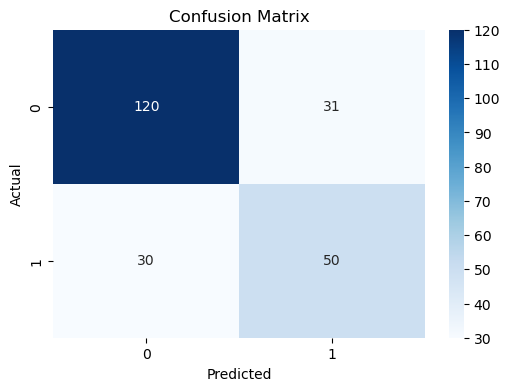

In [19]:
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step-08 plotting graphs and checking accuracy

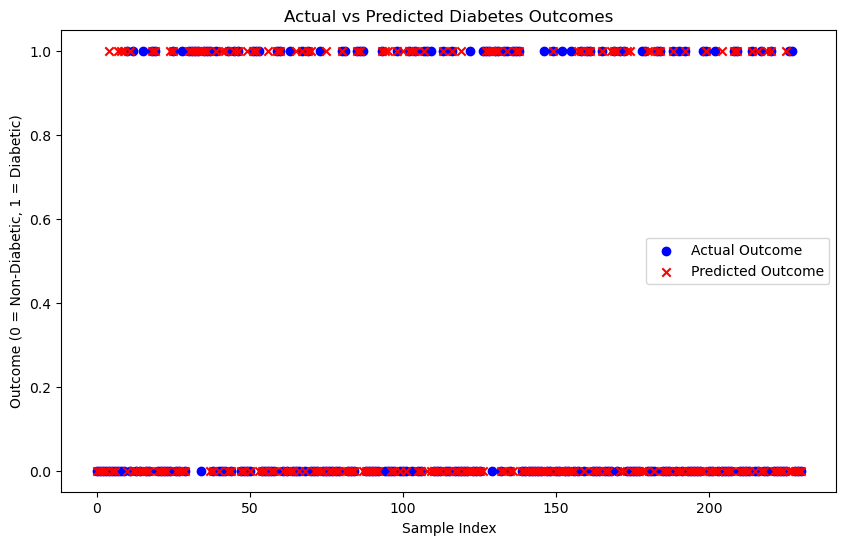

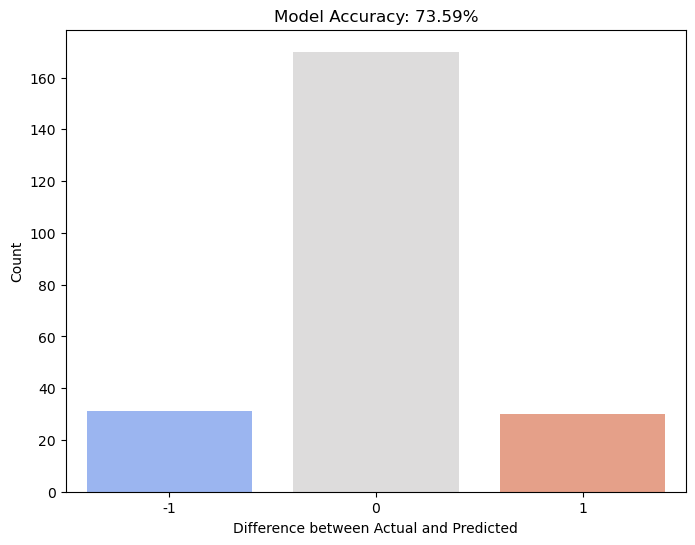

In [20]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))

# Scatter plot to show predicted vs actual
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Outcome', marker='o')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Outcome', marker='x')

# Adding some visual details
plt.title('Actual vs Predicted Diabetes Outcomes')
plt.xlabel('Sample Index')
plt.ylabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.legend()
plt.show()

# Showing Accuracy on the plot
plt.figure(figsize=(8, 6))
sns.countplot(x=y_test - y_pred, palette="coolwarm")
plt.title(f'Model Accuracy: {accuracy * 100:.2f}%')
plt.xlabel('Difference between Actual and Predicted')
plt.ylabel('Count')
plt.show()


In [21]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =  model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic
